In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [25]:
dataset=pd.read_csv('checking.csv')

In [26]:
dataset.head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",62,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.2520,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",58,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.6090,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",51,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.8210,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",74,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.8100,123.021,4
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,10,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.4790,82.168,4
5,79hfXFxxw7rQVp0HVvhutu,"Shide Boss, Mazza On The Track",Swing My Way (Sohniye),Swing My Way (Sohniye),39,128813,False,0.760,0.477,5,-9.666,0,0.1030,0.3480,0.000000,0.1490,0.5670,96.988,4
6,5gr25T51b11HpK72jGjmcC,Prismin,Barsaat,Barsaat,40,192014,False,0.619,0.372,5,-13.115,1,0.0307,0.2270,0.000000,0.1690,0.3690,100.070,4
7,1SIttgyGv61OU31Z0H3g6z,Shazvit,Raaste,Raaste,26,138352,False,0.627,0.555,0,-7.880,1,0.0533,0.7750,0.000002,0.1020,0.7270,170.199,4
8,5gdO3fgWvjACjpt8nB0uqi,"Shreya Sharma, Mazza On The Track, Shreya Jain",Soyi Khoyi (Remix),Soyi Khoyi - Remix,18,126101,False,0.842,0.451,1,-10.434,0,0.0727,0.3920,0.000007,0.5640,0.5580,117.991,4
9,1k3i030OvSLAjHf4wv4pf2,Siddhant Goenka,Farishtey,Farishtey,41,201882,False,0.336,0.486,7,-10.336,1,0.0408,0.0809,0.000022,0.5660,0.1020,169.862,4


In [74]:
dataset = dataset.drop_duplicates()

In [76]:
dataset.shape

(230, 23)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          230 non-null    object 
 1   artists           230 non-null    object 
 2   album_name        230 non-null    object 
 3   track_name        230 non-null    object 
 4   popularity        230 non-null    int64  
 5   duration_ms       230 non-null    int64  
 6   explicit          230 non-null    bool   
 7   danceability      230 non-null    float64
 8   energy            230 non-null    float64
 9   key               230 non-null    int64  
 10  loudness          230 non-null    float64
 11  mode              230 non-null    int64  
 12  speechiness       230 non-null    float64
 13  acousticness      230 non-null    float64
 14  instrumentalness  230 non-null    float64
 15  liveness          230 non-null    float64
 16  valence           230 non-null    float64
 1

In [29]:
dataset.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,230.000000,230.00000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,43.252174,207762.50000,0.625191,0.562913,4.821739,-8.054052,0.600000,0.062828,0.456310,0.018034,0.155980,0.492220,114.964813,3.895652
std,18.574455,49826.87006,0.149618,0.176241,3.613229,2.918247,0.490966,0.057468,0.277368,0.099720,0.106993,0.214458,27.925527,0.358890
min,0.000000,60005.00000,0.172000,0.117000,0.000000,-17.410000,0.000000,0.025400,0.003320,0.000000,0.031800,0.032700,73.753000,1.000000
25%,27.000000,174037.25000,0.538000,0.442000,1.000000,-9.656500,0.000000,0.032725,0.221000,0.000000,0.093400,0.347000,94.996250,4.000000
50%,41.000000,204611.00000,0.627000,0.555000,5.000000,-7.628500,1.000000,0.040300,0.448500,0.000003,0.113000,0.478500,108.013000,4.000000
75%,57.000000,241158.75000,0.738500,0.691500,8.000000,-6.113500,1.000000,0.064725,0.688250,0.000141,0.181000,0.648750,128.067000,4.000000
max,88.000000,346290.00000,0.926000,0.966000,11.000000,-1.765000,1.000000,0.389000,0.970000,0.913000,0.665000,0.963000,200.185000,5.000000


In [30]:
dataset.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [31]:
data_numeric = dataset.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1)

In [32]:
data_numeric

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,62,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.2520,117.202,4
1,58,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.6090,127.087,4
2,51,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.8210,105.063,4
3,74,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.8100,123.021,4
4,10,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.4790,82.168,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,52,183882,False,0.620,0.832,9,-4.137,1,0.0400,0.0806,0.000000,0.0685,0.7910,149.949,4
226,88,271169,False,0.273,0.405,0,-5.810,1,0.0298,0.7350,0.000000,0.1890,0.5340,89.480,3
227,31,249105,False,0.777,0.923,11,-3.772,0,0.2300,0.2430,0.000000,0.1040,0.7100,166.093,4
228,41,161301,False,0.654,0.416,0,-11.952,1,0.0484,0.8080,0.002420,0.1130,0.2030,97.972,4


In [33]:
# Assuming your boolean column is named 'explicit'
data_numeric['explicit'] = data_numeric['explicit'].astype(int)


In [34]:
data_numeric

# saving the dataframe
data_numeric.to_csv('numeric_data.csv')

In [35]:
data_numeric.shape

(230, 15)

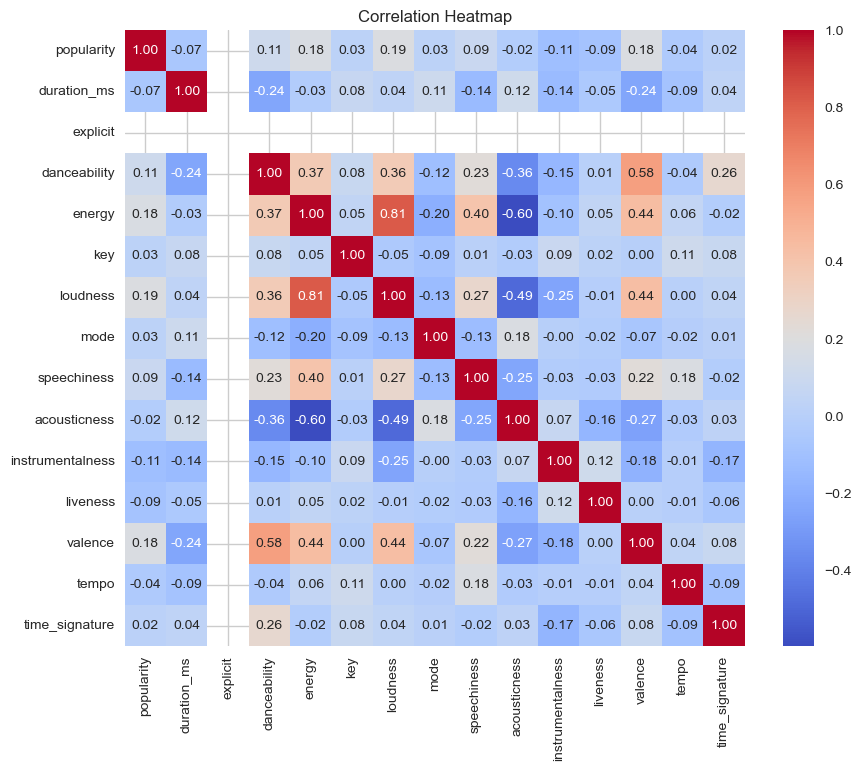

In [36]:
import seaborn as sns

# Calculate the correlation matrix
corr = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


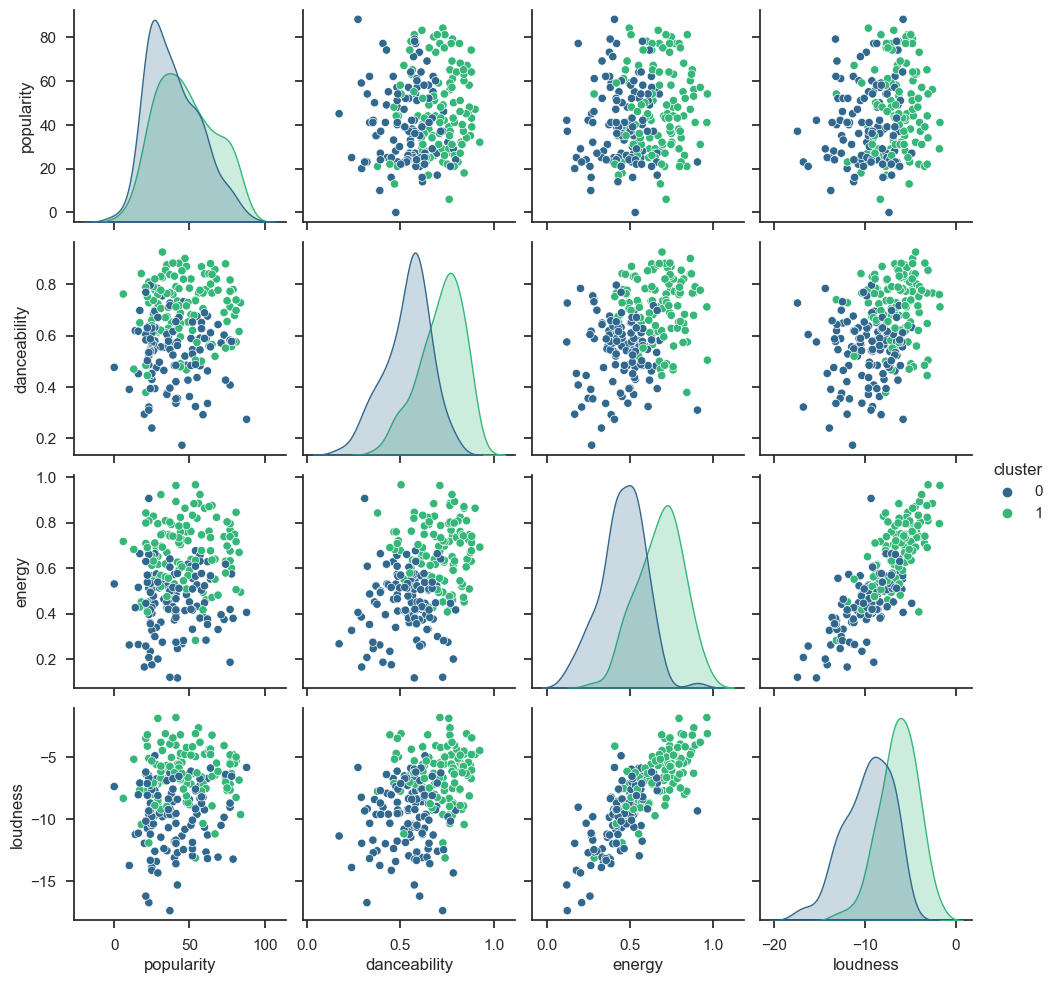

In [45]:
import seaborn as sns

# Set style
sns.set(style="ticks")

# Pairplot with hue as cluster
sns.pairplot(dataset, vars=['popularity', 'danceability', 'energy', 'loudness'], hue='cluster', palette='viridis')
plt.show()


In [37]:

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [72]:
data_scaled

array([[ 1.01153525,  0.72101026,  0.        , ..., -1.12257159,
         0.08028734,  0.29138576],
       [ 0.79571604, -0.78243617,  0.        , ...,  0.54572438,
         0.43503658,  0.29138576],
       [ 0.41803242, -1.12156592,  0.        , ...,  1.53642115,
        -0.35535262,  0.29138576],
       ...,
       [-0.66106362,  0.83153265,  0.        , ...,  1.01770727,
         1.83486955,  0.29138576],
       [-0.1215156 , -0.93449245,  0.        , ..., -1.35155339,
        -0.60983182,  0.29138576],
       [-1.09270204, -2.87141995,  0.        , ..., -2.14738197,
        -1.47899437, -2.5010611 ]])

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



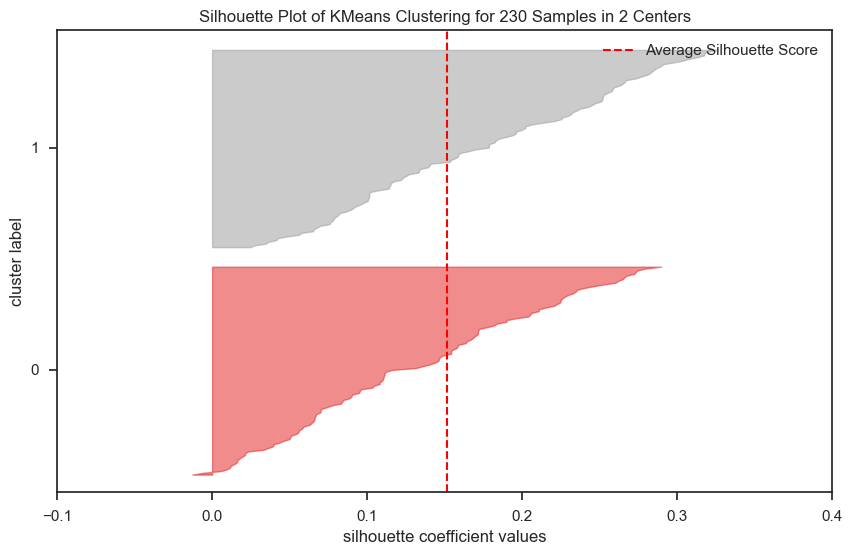

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



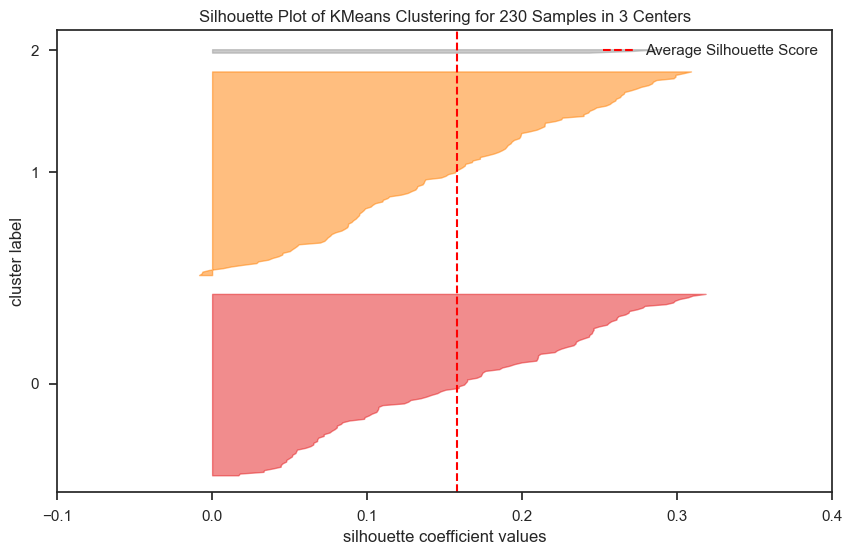

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



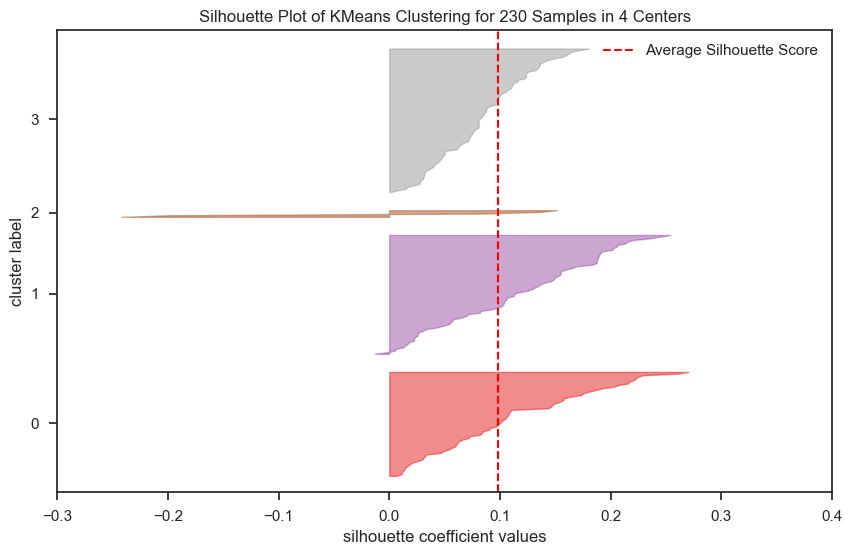

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



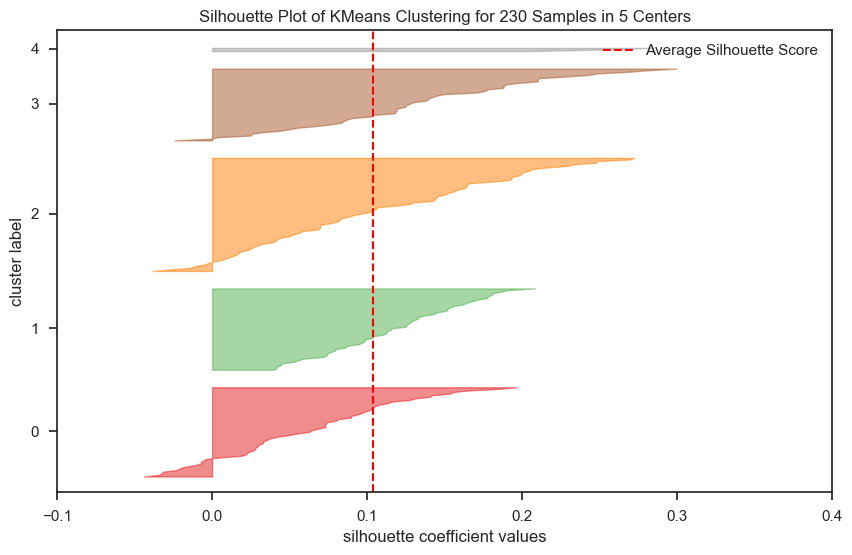

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



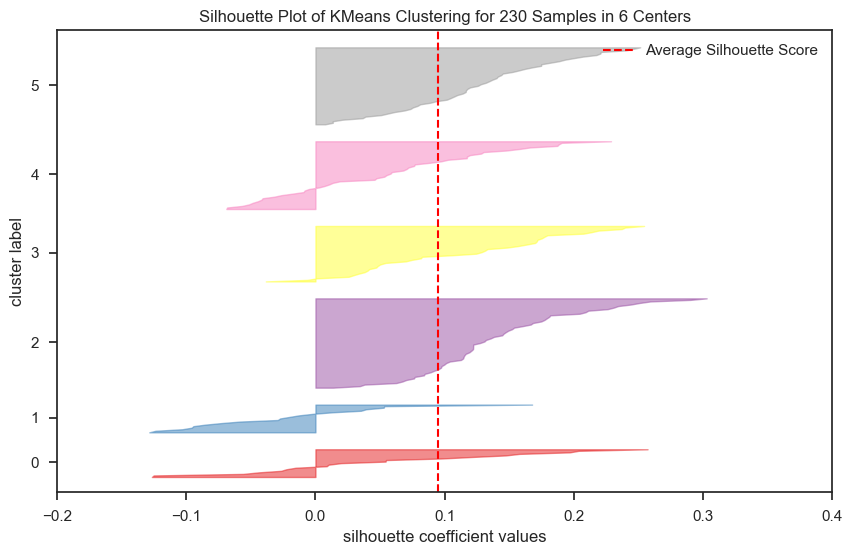

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



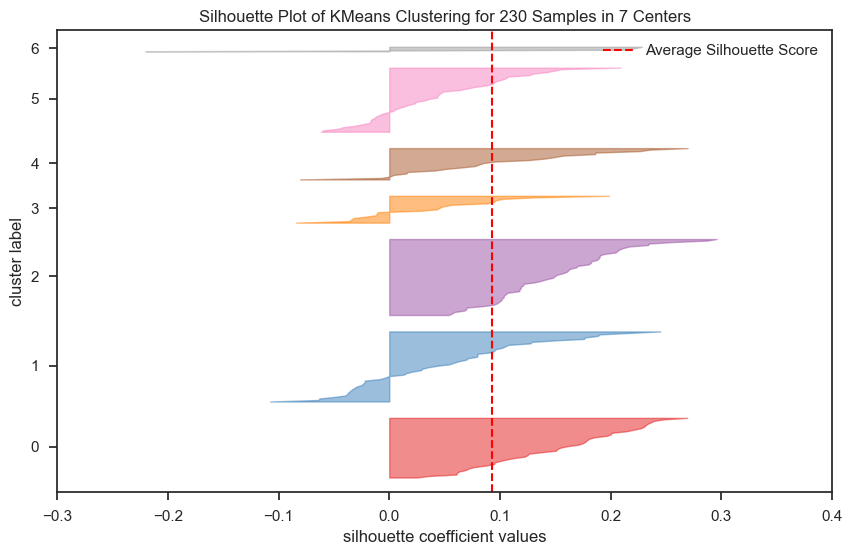

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



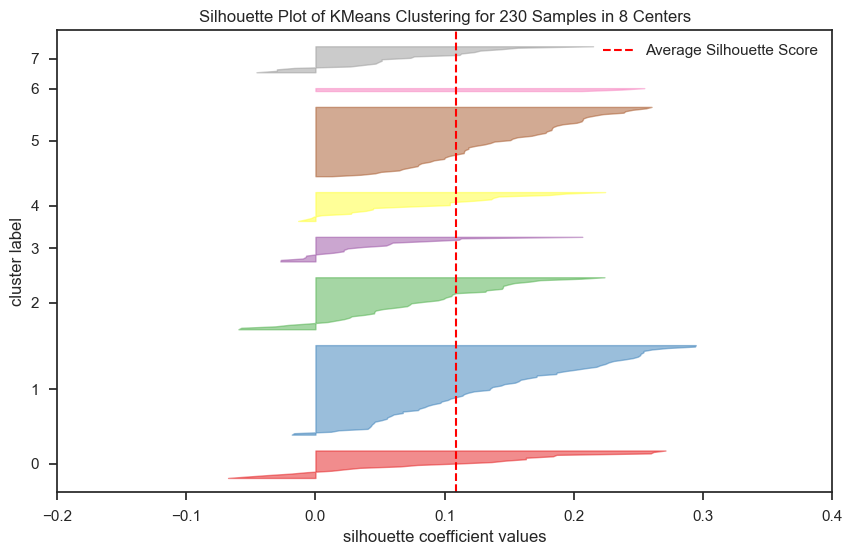

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



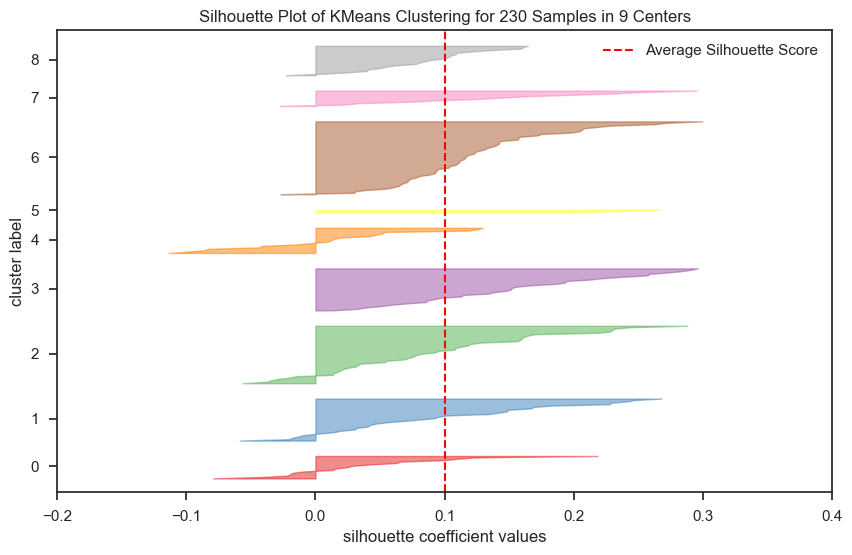

For k=2, the silhouette score is: 0.15156358496053665
For k=3, the silhouette score is: 0.15778118714984846
For k=4, the silhouette score is: 0.09800562207042109
For k=5, the silhouette score is: 0.10359625922632504
For k=6, the silhouette score is: 0.09449888978085132
For k=7, the silhouette score is: 0.09294934434108322
For k=8, the silhouette score is: 0.1087816791845295
For k=9, the silhouette score is: 0.10004736095565857


In [46]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Range of k values to try
k_values = [2, 3, 4, 5, 6, 7, 8, 9]

# Dictionary to store silhouette scores
silhouette_scores = {}

for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    clusters = kmeans.predict(data_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_scaled, clusters)
    silhouette_scores[k] = silhouette_avg
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    visualizer = SilhouetteVisualizer(kmeans, k_values=k, metric='euclidean')
    visualizer.fit(data_scaled)
    visualizer.show()


# Print silhouette scores
for k, silhouette_avg in silhouette_scores.items():
    print(f"For k={k}, the silhouette score is: {silhouette_avg}")



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/saivamshi

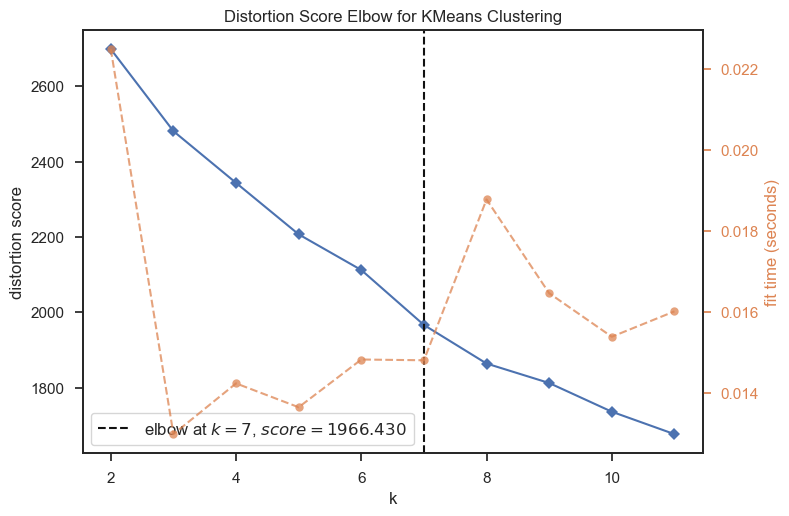

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Create KMeans model
model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion')

# Fit the data and visualize
visualizer.fit(data_scaled)  # Assuming data_scaled is your scaled dataset
visualizer.show()


In [73]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans

# List of k values
k_values = [2, 3, 7]

# Loop through each k value
for k in k_values:
    # Performing k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    clusters = kmeans.predict(data_scaled)
    col_name = 'cluster'
    # Adding cluster labels to the original dataset
    dataset[col_name] = clusters

    # Create a PCA visualization for the current k value
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(data_scaled)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    pca_df['cluster'] = dataset['cluster']

    # Create a scatter plot for each cluster
    data = []
    for cluster_label in pca_df['cluster'].unique():
        cluster_data = pca_df[pca_df['cluster'] == cluster_label]
        scatter = go.Scatter3d(
            x=cluster_data['PC1'],
            y=cluster_data['PC2'],
            z=cluster_data['PC3'],
            mode='markers',
            name=f'Cluster {cluster_label}',
            marker=dict(
                size=5,
                opacity=0.8,
                color=cluster_label,  # Color by cluster label
                colorscale='Viridis'
            )
        )
        data.append(scatter)

    # Layout configuration
    layout = go.Layout(
        title=f'PCA Visualization of Clustered Data (k={k})',
        scene=dict(
            xaxis=dict(title='Principal Component 1'),
            yaxis=dict(title='Principal Component 2'),
            zaxis=dict(title='Principal Component 3')
        ),
        margin=dict(l=0, r=0, b=0, t=30)
    )

    # Create figure
    fig = go.Figure(data=data, layout=layout)

    # Show plot
    fig.show()
    fig.write_html(f'plotly_figure_{k}.html')


/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



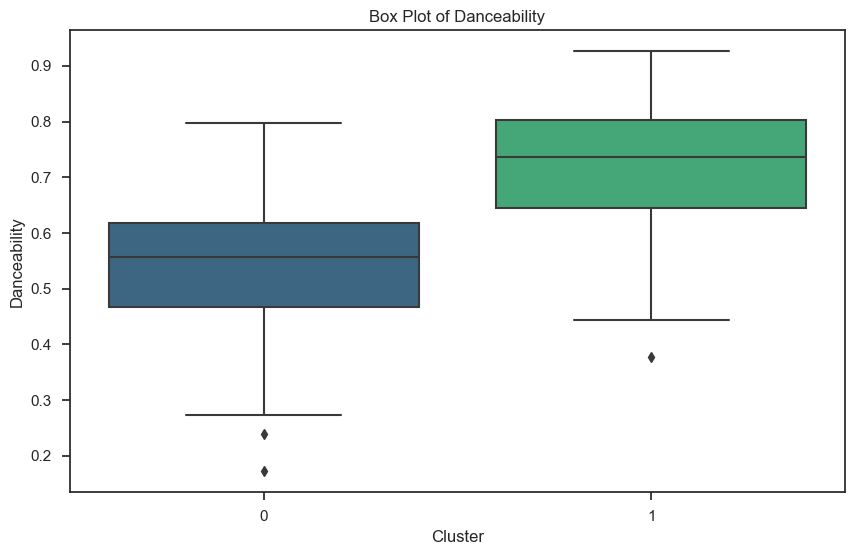

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="ticks")

# Create a box plot for each feature with cluster as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_2', y='danceability', data=dataset, palette='viridis')
plt.title('Box Plot of Danceability')
plt.xlabel('Cluster')
plt.ylabel('Danceability')
plt.show()


In [57]:
dataset

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,cluster_2,cluster_3,cluster_7
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",62,243610,False,0.462,0.628,2,...,0.2350,0.000000,0.0822,0.2520,117.202,4,2,0,1,2
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",58,168861,False,0.869,0.746,9,...,0.1420,0.000000,0.3200,0.6090,127.087,4,4,1,0,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",51,152000,False,0.682,0.638,0,...,0.5440,0.000000,0.1780,0.8210,105.063,4,5,1,0,5
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",74,180172,False,0.880,0.630,0,...,0.0219,0.000000,0.0663,0.8100,123.021,4,0,1,0,0
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,10,273488,False,0.390,0.262,5,...,0.6910,0.000005,0.1310,0.4790,82.168,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,25qNCxhu9VzFgcCPawszwh,"Arijit Singh, Shankar-Ehsaan-Loy, Javed Akhtar","In Raahon Mein (From ""The Archies"")","In Raahon Mein (From ""The Archies"")",52,183882,False,0.620,0.832,9,...,0.0806,0.000000,0.0685,0.7910,149.949,4,0,1,0,0
226,3yHyiUDJdz02FZ6jfUbsmY,"Arijit Singh, Shreyas Puranik, Siddharth - Garima","Satranga (From ""ANIMAL"")","Satranga (From ""ANIMAL"")",88,271169,False,0.273,0.405,0,...,0.7350,0.000000,0.1890,0.5340,89.480,3,3,0,1,3
227,0zChJEMR8w3kGYsGACFZGm,"Yo Yo Honey Singh, Khaalif, Harjot Kaur",Starfish,Kudiye Ni Tere,31,249105,False,0.777,0.923,11,...,0.2430,0.000000,0.1040,0.7100,166.093,4,4,1,0,4
228,2xOmEPAN79q9s2rfp50vIz,"Shekhar Ravjiani, Shreya Ghoshal, JUNO",Vaari Vaari,Vaari Vaari,41,161301,False,0.654,0.416,0,...,0.8080,0.002420,0.1130,0.2030,97.972,4,1,0,1,1
